In [1]:
import matplotlib.pyplot as plt
import Analyzer

#### 볼린저 밴드 지표 
    주가의 변동이 표준 정규분포를 따른다는 가정에서
    주가의 위아래에 밴드를 표시함으로써 주가의 상대적인 높낮이를 알려줌

In [2]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2019-01-02')

end_date is initialized to '2020-10-05'


##### 표준 볼린저 밴드 공식 
- 상단 볼린저 밴드 = 중간 볼린저 밴드 + (2 * 표준편차)
- 중간 볼린저 밴드 = 종가의 20일 이동평균 
- 하단 볼린저 밴드 = 중간 볼린저 밴드 - (2 * 표준편차)

In [3]:
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])  
df = df[19:]

##### 볼린저 밴드 지표 1 : %b

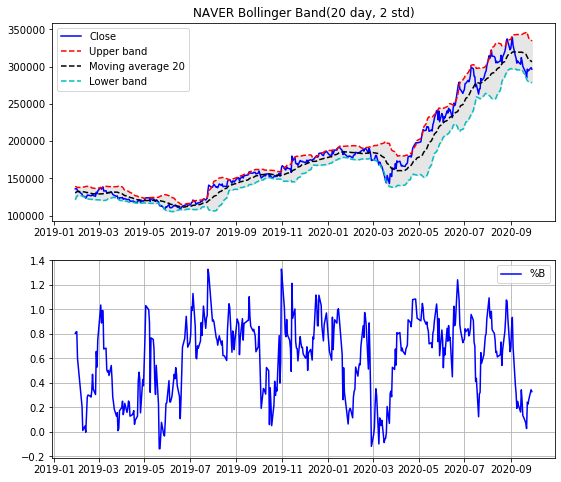

In [6]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)  
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  
plt.plot(df.index, df['PB'], color='b', label='%B')
plt.grid(True)
plt.legend(loc='best')
plt.show()

##### 볼린저 밴드 지표 2 : 밴드폭
밴드폭 = (상단 볼린저 밴드

In [9]:
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100
df = df[19:]

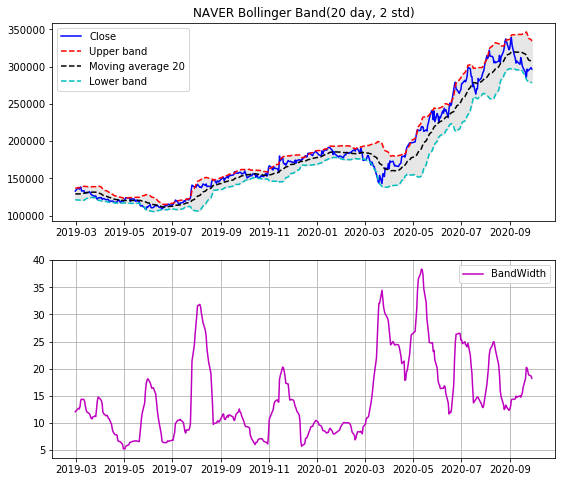

In [10]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)  # ②
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()